In [32]:
import sys
sys.path.append('/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/GP_models')
sys.path.append('/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower')
import helper
from numpy.linalg import inv
import numpy as np
from matplotlib import pyplot as plt
import scipy.io.wavfile as wav
from numpy.linalg import cholesky, det
from scipy.linalg import solve_triangular
from librosa import note_to_hz as hz


In [1]:
# Set up wav file as data
# Training data
wav_file = '/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/wav_files/G#3.wav'
sample_rate, data = wav.read(wav_file)
data = data[8000:9000]

# data = data[4600:6600]

audio_duration = len(data)/sample_rate
time_samples = np.linspace(0, audio_duration, len(data))
helper.plot_audio(time_samples, data)

NameError: name 'wav' is not defined

[0.93162218 0.42087234 0.99254625 0.9452889 ]


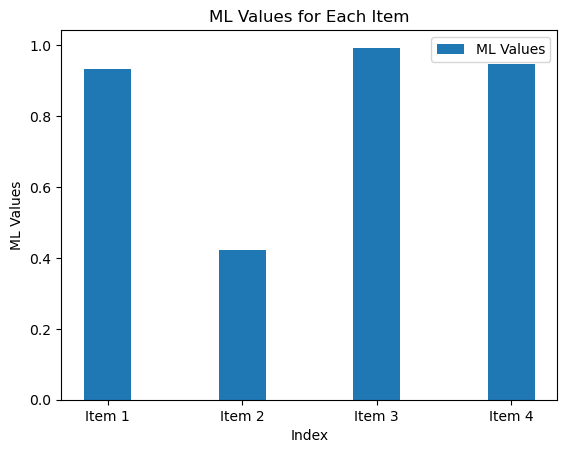

In [80]:
lml = []
lml.append(-helper.stable_nlml(time_samples, data, M=9, normalised=False,sigma_f=0.1, f=hz(['G#3'])))
lml.append(-helper.stable_nlml(time_samples, data, M=9, normalised=False,sigma_f=0.1, f=hz([ 'G#4'])))
lml.append(-helper.stable_nlml(time_samples, data, M=9, normalised=False,sigma_f=0.1, f=hz(['G#2','G#1'])))
lml.append(-helper.stable_nlml(time_samples, data, M=9, normalised=False,sigma_f=0.1, f=hz(['G#2', 'G#3'])))

lml = np.array(lml)
noramlised_lml = lml/np.sum(abs(lml))
ml = np.exp(noramlised_lml)



print(ml)

# Plotting a bar graph
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(ml))

bars = ax.bar(index, ml, bar_width, label='ML Values')

ax.set_xlabel('Index')
ax.set_ylabel('ML Values')
ax.set_title('ML Values for Each Item')
ax.set_xticks(index)
ax.set_xticklabels([f'Item {i+1}' for i in range(len(ml))])
ax.legend()

plt.show()

In [ ]:
def which_octave(f: list, time_samples, data):
    lml = []
    for octave in range(7):
        lml.append(-helper.stable_nlml(time_samples, data, f=f)) 


In [4]:
# Investingating f

frequencies = np.linspace(20, 5000, 400)
data_points = []
for f in frequencies:
    data_points.append(-helper.relative_nlml(time_samples, data, M=10, sigma_f=1/50000, f=[f]))


plt.plot(frequencies, data_points)

plt.show()

NameError: name 'time_samples' is not defined

In [14]:
lml = np.array(data_points) 
plt.plot(frequencies, lml)
plt.vlines(523, ymin=-4, ymax=0 ,colors='pink', zorder=2)
plt.show()


NameError: name 'data_points' is not defined

1it [00:00, 11.81it/s]
1it [00:00, 12.39it/s]
1it [00:00, 15.45it/s]
1it [00:00, 16.32it/s]
1it [00:00, 17.72it/s]
1it [00:00, 16.69it/s]
1it [00:00, 17.00it/s]
1it [00:00, 16.55it/s]
1it [00:00, 13.40it/s]
1it [00:00, 15.22it/s]
1it [00:00, 15.31it/s]
1it [00:00, 16.26it/s]
1it [00:00, 15.05it/s]
1it [00:00, 17.10it/s]
1it [00:00, 17.17it/s]
1it [00:00, 17.06it/s]
1it [00:00, 17.26it/s]
1it [00:00, 15.61it/s]
1it [00:00, 16.60it/s]
1it [00:00, 16.55it/s]
1it [00:00, 15.80it/s]
1it [00:00, 17.41it/s]
1it [00:00, 17.71it/s]
1it [00:00, 16.05it/s]
1it [00:00, 16.71it/s]
1it [00:00, 13.25it/s]
1it [00:00, 11.77it/s]
1it [00:00, 14.90it/s]
1it [00:00, 15.76it/s]
1it [00:00, 18.23it/s]
1it [00:00, 13.15it/s]
1it [00:00, 21.11it/s]
1it [00:00, 22.78it/s]
1it [00:00, 21.01it/s]
1it [00:00, 20.19it/s]
1it [00:00, 22.38it/s]
1it [00:00, 22.98it/s]
1it [00:00, 21.83it/s]
1it [00:00, 23.04it/s]
1it [00:00, 13.51it/s]
1it [00:00, 12.47it/s]
1it [00:00, 11.75it/s]
1it [00:00, 16.56it/s]
1it [00:00,

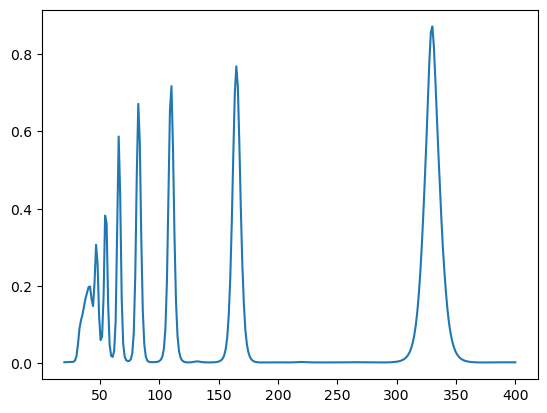

In [21]:
# Finer scle focus
frequencies = np.linspace(20, 400, 300)
data_points_finer = []
for f in frequencies:
    data_points_finer.append(np.exp(-helper.relative_nlml(time_samples, data, M=10, sigma_f=1/200, f=[f])))

plt.plot(frequencies, data_points_finer)
plt.show()

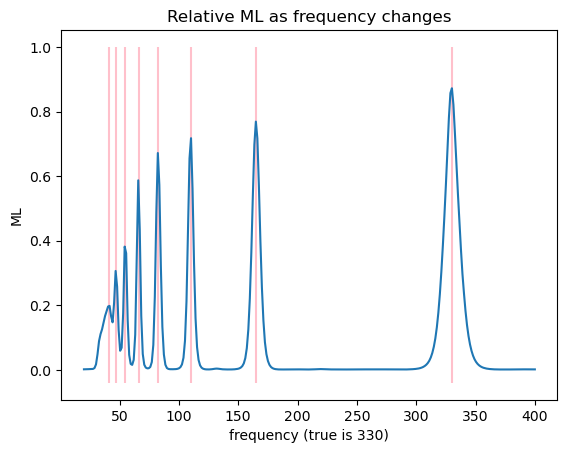

In [23]:
# Plotting nicely
plt.plot(frequencies, data_points_finer)

plt.vlines(330, ymin=-0.04, ymax=1 ,colors='pink', zorder=2)
plt.vlines(330/2, ymin=-0.04, ymax=1 ,colors='pink', zorder=2)
plt.vlines(330/3, ymin=-0.04, ymax=1 ,colors='pink', zorder=2)
plt.vlines(330/4, ymin=-0.04, ymax=1 ,colors='pink', zorder=2)

plt.vlines(330/5, ymin=-0.04, ymax=1 ,colors='pink', zorder=2)
plt.vlines(330/6, ymin=-0.04, ymax=1 ,colors='pink', zorder=2)
plt.vlines(330/7, ymin=-0.04, ymax=1 ,colors='pink', zorder=2)
plt.vlines(330/8, ymin=-0.04, ymax=1 ,colors='pink', zorder=2)
plt.ylabel("ML")
plt.xlabel("frequency (true is 330)")
plt.title("Relative ML as frequency changes")
plt.show()

In [41]:
one = np.exp(-helper.relative_nlml(time_samples, data, M=10, sigma_f=1/15, f=[330]))
two = np.exp(-helper.relative_nlml(time_samples, data, M=10, sigma_f=1/15, f=[330/2]))
print(one-two)
print(one)
print(two)

1it [00:00, 13.42it/s]
1it [00:00, 13.04it/s]

0.1046765043098985
0.8745811850289102
0.7699046807190117


In [ ]:
# M

In [ ]:
# v and T